<a href="https://colab.research.google.com/github/Matthieu-PERRIN-dev/Deep_learning_with_python/blob/main/chap3_premiers_tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***First tensors***

In [72]:
import tensorflow as tf
import numpy as np

In [ ]:
x = tf.ones(shape=(2,1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [5]:
y = tf.random.normal(shape=(3,1), mean=0, stddev=1)
print(y)

tf.Tensor(
[[-0.14010248]
 [ 1.4274088 ]
 [ 1.2543471 ]], shape=(3, 1), dtype=float32)


In [6]:
z = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(z)

tf.Tensor(
[[0.10023928]
 [0.46528852]
 [0.48706555]], shape=(3, 1), dtype=float32)


##*TensorFlow tensors aren't assignable*



In [ ]:
fail_assigment_tensor = tf.ones(shape=(2, 1))
fail_assigment_tensor[0, 0] = 0

#***First variables***

In [17]:
v = tf.Variable(initial_value= tf.random.normal(shape=(3,2)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 2) dtype=float32, numpy=
array([[-1.031874  , -2.0179262 ],
       [-1.6875747 , -0.39985168],
       [-0.8101542 ,  0.30160064]], dtype=float32)>


## *Assign a value to a TF Variable*

In [31]:
v.assign(tf.ones((3,2)))

<tf.Variable 'UnreadVariable' shape=(3, 2) dtype=float32, numpy=
array([[1., 1.],
       [1., 1.],
       [1., 1.]], dtype=float32)>

In [32]:
v[1].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 2) dtype=float32, numpy=
array([[1., 1.],
       [3., 3.],
       [1., 1.]], dtype=float32)>

In [33]:
v[0, 1].assign(0)

<tf.Variable 'UnreadVariable' shape=(3, 2) dtype=float32, numpy=
array([[1., 0.],
       [3., 3.],
       [1., 1.]], dtype=float32)>

In [34]:
v.assign_add(tf.ones((3,2))) # or assign_sub

<tf.Variable 'UnreadVariable' shape=(3, 2) dtype=float32, numpy=
array([[2., 1.],
       [4., 4.],
       [2., 2.]], dtype=float32)>

##*Tensors operations*

In [45]:
# these operation gets executed on the fly : it is called "eager execution"
a = tf.constant([[2., 2.], [1.,1.]])
b  = tf.square(a) #element wise
c = tf.sqrt(a) #element wise
d = b + c
e = tf.matmul(a, b)
e *=d # equal to e = e*d (element wise)
print(a)
print(b)
print(c)
print(d)
print(e)

tf.Tensor(
[[2. 2.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[4. 4.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1.4142135 1.4142135]
 [1.        1.       ]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[5.4142137 5.4142137]
 [2.        2.       ]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[54.142136 54.142136]
 [10.       10.      ]], shape=(2, 2), dtype=float32)


#***Using the GradientTape***

In [51]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape :
  result = tf.square(input_var)
  gradient = tape.gradient(result, input_var)
  print(f"input var : {input_var}")
  print(f"result : {result}")
  print(f"gradient : {gradient}")
  # on a donc 3^2 = 9 et la dérivée de x^2 en x=3 c'est 2*x = 6

input var : <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.0>
result : 9.0
gradient : 6.0


**Only trainable variables are tracked by default by the GradientTape. To track a constant tensor, use tape.watch()**





In [68]:
input_const = tf.constant(4.) #could be also a random.uniform etc... Every tensor that isn't a tf.Variable
with tf.GradientTape() as tape:
   tape.watch(input_const)
   res = tf.square(input_const)
   grad = tape.gradient(res, input_const)
print(f"input_const : {input_const}")
print(f"res : {res}")
print(f"grad : {grad}")

input_const : 4.0
res : 16.0
grad : 8.0


##*Nested gradient tapes to compute seconde order gradients*

In [71]:
time = tf.Variable(3.)
with tf.GradientTape() as outer_tape:
  with tf.GradientTape() as inner_tape:
    position =  4.9 * time ** 2
  speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)
print(position)
print(speed)
print(acceleration)

tf.Tensor(44.100002, shape=(), dtype=float32)
tf.Tensor(29.400002, shape=(), dtype=float32)
tf.Tensor(9.8, shape=(), dtype=float32)


#***The "Linear Classifier" example***



In [74]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

**stack the two arrays of shape (1000,2) into a single array of shape (2000,2)**

In [78]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

**Let’s generate the corresponding target training labels, an array of zeros and ones of shape
 (2000, 1), where targets[i, 0] is 0 if inputs[i] belongs to class 0 (and inversely).**



In [82]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
             np.ones((num_samples_per_class, 1), dtype="float32")))
print(targets)

[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]


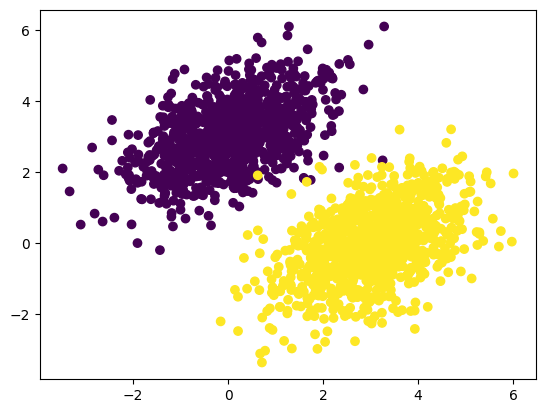

In [81]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

**Creating the linear classifier variables**

In [90]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

**Creating the forward pass function** (Because the linear classifier operates on a 2D inputs, W is just 2 scalar coefficients, meanwhile b is a single scalar coefficient)

In [92]:
def model(inputs) :
  return tf.matmul(inputs, W) + b # each point of array inputs is multiplied by W then added with b. Then everything is stored in a tensor of shape=(1,)

**The mean squared error loss function**

In [93]:
def square_loss(targets, predictions):
  per_sample_losses = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_losses)  # need to average these per-sample loss scores into a single scalar loss value ; this is what reduce_mean does

**The trainning step function**

In [95]:
learning_rate = 0.1

def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(predictions, targets)
  grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
  W.assign_sub(grad_loss_wrt_W * learning_rate)
  b.assign_sub(grad_loss_wrt_b * learning_rate)
  return loss

**The batch training loop**

In [97]:
for step in range(40):
  loss = training_step(inputs, targets)
  print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 0.0285
Loss at step 1: 0.0282
Loss at step 2: 0.0280
Loss at step 3: 0.0278
Loss at step 4: 0.0277
Loss at step 5: 0.0275
Loss at step 6: 0.0274
Loss at step 7: 0.0272
Loss at step 8: 0.0271
Loss at step 9: 0.0270
Loss at step 10: 0.0269
Loss at step 11: 0.0268
Loss at step 12: 0.0267
Loss at step 13: 0.0266
Loss at step 14: 0.0265
Loss at step 15: 0.0265
Loss at step 16: 0.0264
Loss at step 17: 0.0264
Loss at step 18: 0.0263
Loss at step 19: 0.0263
Loss at step 20: 0.0262
Loss at step 21: 0.0262
Loss at step 22: 0.0261
Loss at step 23: 0.0261
Loss at step 24: 0.0261
Loss at step 25: 0.0260
Loss at step 26: 0.0260
Loss at step 27: 0.0260
Loss at step 28: 0.0260
Loss at step 29: 0.0260
Loss at step 30: 0.0259
Loss at step 31: 0.0259
Loss at step 32: 0.0259
Loss at step 33: 0.0259
Loss at step 34: 0.0259
Loss at step 35: 0.0259
Loss at step 36: 0.0259
Loss at step 37: 0.0258
Loss at step 38: 0.0258
Loss at step 39: 0.0258


**The result**

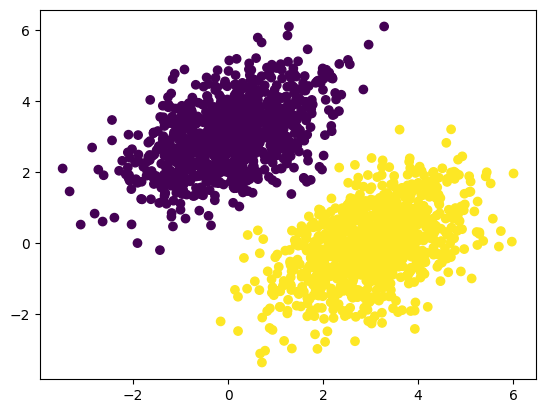

In [98]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

**Plot the line that is used by the model to classify the points**

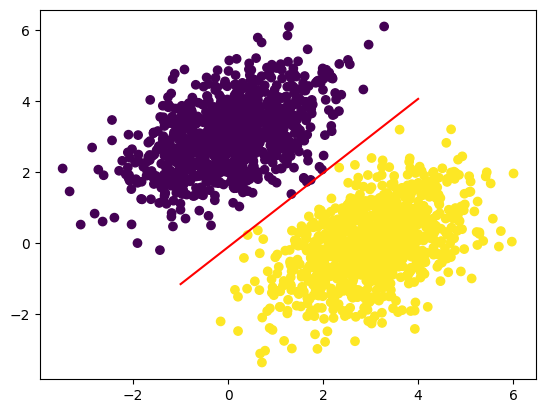

In [99]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)